# 1.Flight Price Prediction
## Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

# 2. Import Liabrary

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 3.Import Dataset

In [229]:
df_train=pd.read_excel("Data_Trainflight.xlsx")
df_test=pd.read_excel("Test_setflight.xlsx")

**There are two dataset available train and test data.**

# 4.Basic Analysis of Dataset

In [230]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [231]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [232]:
print("Shape of Train Dataset:",df_train.shape)
print("Total Rows in Train Dataset:",df_train.shape[0])
print("Total Columns in Train Dataset:",df_train.shape[1])
print("************************************")
print("Shape of Test Dataset:",df_test.shape)
print("Total Rows in Test Dataset:",df_test.shape[0])
print("Total Columns in Test Dataset:",df_test.shape[1])

Shape of Train Dataset: (10683, 11)
Total Rows in Train Dataset: 10683
Total Columns in Train Dataset: 11
************************************
Shape of Test Dataset: (2671, 10)
Total Rows in Test Dataset: 2671
Total Columns in Test Dataset: 10


In [233]:
print(df_train.info())
print("\n*******************************************")
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None

*******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A

**Observation.**
- There are 10 columns which data type is object and 1 columns which is int64 in train dataset.
- There are 10 columns which data type is object in test dataset.

In [234]:
df_train.describe(include="all")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


**Observation.**
- There are missing value in Route,Total_Stops features.
- Except our target variable all feature are in object type.
- There are 12 type of unique ariline dataset is available.
- Maximum Airline source place is Delhi and Destination place is Cochin.
- There are 128 unique route for airline.

In [235]:
df_test.describe(include="all")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


**Observation**
- In test dataset all columns are in object type.
- There are 11 unique ariline data is available in test dataset.
- There is no missing value in test dataset.

# 5. Checking null value in dataset

In [236]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

**There are 2 columns where null value exist.**

In [237]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

**There is no null value in Test dataset.**

# 6. Dealing null value in Train dataset.

In [238]:
df_train[df_train["Route"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [239]:
df_train[df_train["Route"].isnull()]["Total_Stops"]

9039    NaN
Name: Total_Stops, dtype: object

**As we can see there in row numeber 9039, in both coluumns Route and Total_Stops having NaN value, so we will drop this rows will help us to remove NaN from both columns.**

In [240]:
df_train=df_train.dropna(axis=0,subset=["Route"])

In [241]:
df_train[df_train["Route"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [242]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

**As we can see Null value has been removed from the dataset.**

In [243]:
df_train.reset_index(inplace=True,drop=True)

In [244]:
df_train.shape

(10682, 11)

# 7. Feature Generation

## 7.1 Data_of_journey

### For Train dataset

In [245]:
df_train["Date_of_Journey"]

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10677     9/04/2019
10678    27/04/2019
10679    27/04/2019
10680    01/03/2019
10681     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

**As we can see Date of journey having date format as DD/MM/YYYY and data type as object so we would split the column into date,Month and year.**

In [246]:
df_train["Journey_Day"]=pd.to_datetime(df_train.Date_of_Journey,format="%d/%m/%Y").dt.day
df_train["Journey_month"]=pd.to_datetime(df_train.Date_of_Journey,format="%d/%m/%Y").dt.month

In [247]:
df_train.drop("Date_of_Journey",axis=1,inplace=True)

### For Test Dataset

In [248]:
df_test["Date_of_Journey"]

0        6/06/2019
1       12/05/2019
2       21/05/2019
3       21/05/2019
4       24/06/2019
           ...    
2666     6/06/2019
2667    27/03/2019
2668     6/03/2019
2669     6/03/2019
2670    15/06/2019
Name: Date_of_Journey, Length: 2671, dtype: object

In [249]:
df_test["Journey_Day"]=pd.to_datetime(df_test.Date_of_Journey,format="%d/%m/%Y").dt.day
df_test["Journey_month"]=pd.to_datetime(df_test.Date_of_Journey,format="%d/%m/%Y").dt.month

In [250]:
df_test.drop("Date_of_Journey",axis=1,inplace=True)

## 7.1.2 Deaparture Time

### For Train Dataset

In [251]:
df_train["Dep_Hour"]=df_train["Dep_Time"].str.split(":").str[0]
df_train["Dep_Minute"]=df_train["Dep_Time"].str.split(":").str[1]

In [252]:
df_train["Dep_Hour"]=df_train["Dep_Hour"].astype(int)
df_train["Dep_Minute"]=df_train["Dep_Minute"].astype(int)

In [253]:
df_train.drop("Dep_Time",axis=1,inplace=True)

### For Test Dataset

In [254]:
df_test["Dep_Hour"]=df_test["Dep_Time"].str.split(":").str[0]
df_test["Dep_Minute"]=df_test["Dep_Time"].str.split(":").str[1]

In [255]:
df_test["Dep_Hour"]=df_test["Dep_Hour"].astype(int)
df_test["Dep_Minute"]=df_test["Dep_Minute"].astype(int)

In [256]:
df_test.drop("Dep_Time",axis=1,inplace=True)

## 7.1.3 Arrival Time

### For Train Dataset

In [257]:
df_train["Arrival_Time"].value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
22:40 07 May      1
11:10 10 Jun      1
01:10 13 Mar      1
00:25 10 Jun      1
00:40 02 Mar      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [258]:
df_train["Arrival_Time"]=df_train["Arrival_Time"].str.split(" ").str[0]
df_train["Arr_Hour"]=df_train["Arrival_Time"].str.split(":").str[0]
df_train["Arr_Minute"]=df_train["Arrival_Time"].str.split(":").str[1]

In [259]:
df_train["Arr_Hour"]=df_train["Arr_Hour"].astype(int)
df_train["Arr_Minute"]=df_train["Arr_Minute"].astype(int)

In [260]:
df_train.drop("Arrival_Time",axis=1,inplace=True)

### For Test Dataset

In [261]:
df_test["Arrival_Time"]=df_test["Arrival_Time"].str.split(" ").str[0]
df_test["Arr_Hour"]=df_test["Arrival_Time"].str.split(":").str[0]
df_test["Arr_Minute"]=df_test["Arrival_Time"].str.split(":").str[1]

In [262]:
df_test["Arr_Hour"]=df_test["Arr_Hour"].astype(int)
df_test["Arr_Minute"]=df_test["Arr_Minute"].astype(int)

In [263]:
df_test.drop("Arrival_Time",axis=1,inplace=True)

## 7.1.4 Duration

### Train Dataset

In [264]:
df_train["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
19h 50m      1
32h 20m      1
30h 25m      1
3h 25m       1
Name: Duration, Length: 368, dtype: int64

### For Train Dataset

In [265]:
df_train["Duration"]=df_train["Duration"].str.replace("h","*60").str.replace(" ","+").str.replace("m","*1").apply(eval)

In [266]:
df_train["Duration"]

0         170
1         445
2        1140
3         325
4         285
         ... 
10677     150
10678     155
10679     180
10680     160
10681     500
Name: Duration, Length: 10682, dtype: int64

### For Test Dataset

In [267]:
df_test["Duration"]=df_test["Duration"].str.replace("h","*60").str.replace(" ","+").str.replace("m","*1").apply(eval)

In [268]:
df_test["Duration"]

0        655
1        240
2       1425
3        780
4        170
        ... 
2666    1435
2667     155
2668     395
2669     915
2670     860
Name: Duration, Length: 2671, dtype: int64

In [269]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10682 non-null  int64 
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10682 non-null  object
 7   Price            10682 non-null  int64 
 8   Journey_Day      10682 non-null  int64 
 9   Journey_month    10682 non-null  int64 
 10  Dep_Hour         10682 non-null  int32 
 11  Dep_Minute       10682 non-null  int32 
 12  Arr_Hour         10682 non-null  int32 
 13  Arr_Minute       10682 non-null  int32 
dtypes: int32(4), int64(4), object(6)
memory usage: 1001.6+ KB


In [270]:
df_train.shape

(10682, 14)

In [271]:
df_test.shape

(2671, 13)

# 8. Feature Transformation 

**We have seen there are categorical variable in our dataset so we will convert our catergorical variale to Numeric varibale.**

## 8.1 Dealing Airline columns with applying One hot encoder

### For Train Dataset

In [272]:
df_train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

**As we can see there are premium carrier,business class,premium economy and Trujet which ticket price would be high and have very less flights,so we would be these all into other category.**

In [273]:
df_train["Airline"].replace({'Multiple carriers Premium economy':"Other",
                              "Jet Airways Business":"Other",
                              "Vistara Premium economy":"Other",
                              "Trujet":"Other"},inplace=True)

In [274]:
df_train["Airline"].value_counts()

Jet Airways          3849
IndiGo               2053
Air India            1751
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
Other                  23
Name: Airline, dtype: int64

In [275]:
from sklearn.preprocessing import OneHotEncoder

In [276]:
onehotencoder=OneHotEncoder()

In [277]:
x=onehotencoder.fit_transform(df_train.Airline.values.reshape(-1,1)).toarray()

In [278]:
j=df_train["Airline"].value_counts()

In [279]:
dfOnehot=pd.DataFrame(x,columns=["Airline_"+str(i)for i in j.index])

In [280]:
df_train=pd.concat([df_train,dfOnehot],axis=1)

In [281]:
df_train.drop("Airline",axis=1,inplace=True)

### For Test Dataset

In [282]:
df_test["Airline"].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [283]:
df_test["Airline"].replace({'Multiple carriers Premium economy':"Other",
                              "Jet Airways Business":"Other",
                              "Vistara Premium economy":"Other"
                           },inplace=True)

In [284]:
onehotencoder=OneHotEncoder()
x=onehotencoder.fit_transform(df_test.Airline.values.reshape(-1,1)).toarray()
j=df_test["Airline"].value_counts()
dfOnehot=pd.DataFrame(x,columns=["Airline_"+str(i)for i in j.index])
df_test=pd.concat([df_test,dfOnehot],axis=1)

In [285]:
df_test["Airline"].value_counts()

Jet Airways          897
IndiGo               511
Air India            440
Multiple carriers    347
SpiceJet             208
Vistara              129
Air Asia              86
GoAir                 46
Other                  7
Name: Airline, dtype: int64

In [286]:
df_test.drop("Airline",axis=1,inplace=True)

In [287]:
df_train.shape,df_test.shape

((10682, 22), (2671, 21))

## 8.2 Dealing Source with applying OneHotEncoder 

In [288]:
df_train["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

### For Train Dataset

In [289]:
onehotencoder=OneHotEncoder()
x=onehotencoder.fit_transform(df_train.Source.values.reshape(-1,1)).toarray()
j=df_train["Source"].value_counts()
dfOnehot=pd.DataFrame(x,columns=["Source_"+str(i)for i in j.index])
df_train=pd.concat([df_train,dfOnehot],axis=1)

In [290]:
df_train.drop("Source",axis=1,inplace=True)

### For Test Dataset

In [291]:
onehotencoder=OneHotEncoder()
x=onehotencoder.fit_transform(df_test.Source.values.reshape(-1,1)).toarray()
j=df_test["Source"].value_counts()
dfOnehot=pd.DataFrame(x,columns=["Source_"+str(i)for i in j.index])
df_test=pd.concat([df_test,dfOnehot],axis=1)

In [292]:
df_test.drop("Source",axis=1,inplace=True)

In [293]:
df_train.shape,df_test.shape

((10682, 26), (2671, 25))

## 8.3 Dealing with Total stops columns with ordinal encoder

**As we have seen non-stop means 0 stops and this columns data having some order so we will transform with ordinal encoder.**

### For Train Dataset

In [294]:
df_train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [295]:
from sklearn.preprocessing import OrdinalEncoder

In [296]:
enc=OrdinalEncoder(categories=[["non-stop","1 stop","2 stops","3 stops","4 stops"]])

In [297]:
z=enc.fit_transform(df_train.Total_Stops.values.reshape(-1,1))

In [298]:
df_train["Total_Stops"]=z

In [299]:
df_train["Total_Stops"].value_counts()

1.0    5625
0.0    3491
2.0    1520
3.0      45
4.0       1
Name: Total_Stops, dtype: int64

### For Test Dataset

In [300]:
enc=OrdinalEncoder(categories=[["non-stop","1 stop","2 stops","3 stops","4 stops"]])
z=enc.fit_transform(df_test.Total_Stops.values.reshape(-1,1))
df_test["Total_Stops"]=z

In [301]:
df_test["Total_Stops"].value_counts()

1.0    1431
0.0     849
2.0     379
3.0      11
4.0       1
Name: Total_Stops, dtype: int64

In [302]:
df_train.shape,df_test.shape

((10682, 26), (2671, 25))

### 8.4 Dealing Additional Info columns with One hot encoder

In [304]:
df_train["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [305]:
df_train["Additional_Info"].replace({"No info":"No_Info",
                              "No Info":"No_Info",
                              "Red-eye flight":"Other",
                              "1 Short layover":"Other",
                            "2 Long layover": "Other",
                            "1 Long layover":"Other"},inplace=True)

In [306]:
df_train["Additional_Info"].value_counts()

No_Info                         8347
In-flight meal not included     1982
No check-in baggage included     320
Other                             22
Change airports                    7
Business class                     4
Name: Additional_Info, dtype: int64

In [307]:
df_test["Additional_Info"].replace({"No info":"No_Info",
                             "1 Long layover":"Other"
                                             },inplace=True)

In [308]:
df_test["Additional_Info"].value_counts()

No_Info                         2148
In-flight meal not included      444
No check-in baggage included      76
Business class                     1
Change airports                    1
Other                              1
Name: Additional_Info, dtype: int64

In [309]:
df_train.shape,df_test.shape

((10682, 26), (2671, 25))

### For Train Dataset

In [310]:
onehotencoder=OneHotEncoder()
x=onehotencoder.fit_transform(df_train.Additional_Info.values.reshape(-1,1)).toarray()
j=df_train["Additional_Info"].value_counts()
dfOnehot=pd.DataFrame(x,columns=["Additional_Info_"+str(i)for i in j.index])
df_train=pd.concat([df_train,dfOnehot],axis=1)

In [311]:
df_train["Additional_Info"].value_counts()

No_Info                         8347
In-flight meal not included     1982
No check-in baggage included     320
Other                             22
Change airports                    7
Business class                     4
Name: Additional_Info, dtype: int64

In [312]:
df_train.drop("Additional_Info",axis=1,inplace=True)

### For Test Dataset

In [313]:
onehotencoder=OneHotEncoder()
x=onehotencoder.fit_transform(df_test.Additional_Info.values.reshape(-1,1)).toarray()
j=df_test["Additional_Info"].value_counts()
dfOnehot=pd.DataFrame(x,columns=["Additional_Info_"+str(i)for i in j.index])
df_test=pd.concat([df_test,dfOnehot],axis=1)

In [314]:
df_test["Additional_Info"].value_counts()

No_Info                         2148
In-flight meal not included      444
No check-in baggage included      76
Business class                     1
Change airports                    1
Other                              1
Name: Additional_Info, dtype: int64

In [315]:
df_test.drop("Additional_Info",axis=1,inplace=True)

In [316]:
df_train.shape,df_test.shape

((10682, 31), (2671, 30))

### 8.5 Dealing Destination columns with One hot encoder

### For Train Dataset

In [317]:
df_train["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [318]:
onehotencoder=OneHotEncoder()
x=onehotencoder.fit_transform(df_train.Destination.values.reshape(-1,1)).toarray()
j=df_train["Destination"].value_counts()
dfOnehot=pd.DataFrame(x,columns=["Destination"+str(i)for i in j.index])
df_train=pd.concat([df_train,dfOnehot],axis=1)

In [319]:
df_train.drop("Destination",axis=1,inplace=True)

### For Test Dataset

In [320]:
df_test["Destination"].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [321]:
onehotencoder=OneHotEncoder()
x=onehotencoder.fit_transform(df_test.Destination.values.reshape(-1,1)).toarray()
j=df_test["Destination"].value_counts()
dfOnehot=pd.DataFrame(x,columns=["Destination"+str(i)for i in j.index])
df_test=pd.concat([df_test,dfOnehot],axis=1)

In [322]:
df_test.drop("Destination",axis=1,inplace=True)

In [323]:
df_train.shape,df_test.shape

((10682, 36), (2671, 35))

# 9 Exploratory Data Analysis

In [328]:
df_train.columns

Index(['Route', 'Duration', 'Total_Stops', 'Price', 'Journey_Day',
       'Journey_month', 'Dep_Hour', 'Dep_Minute', 'Arr_Hour', 'Arr_Minute',
       'Airline_Jet Airways', 'Airline_IndiGo', 'Airline_Air India',
       'Airline_Multiple carriers', 'Airline_SpiceJet', 'Airline_Vistara',
       'Airline_Air Asia', 'Airline_GoAir', 'Airline_Other', 'Source_Delhi',
       'Source_Kolkata', 'Source_Banglore', 'Source_Mumbai', 'Source_Chennai',
       'Additional_Info_No_Info',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No check-in baggage included', 'Additional_Info_Other',
       'Additional_Info_Change airports', 'Additional_Info_Business class',
       'DestinationCochin', 'DestinationBanglore', 'DestinationDelhi',
       'DestinationNew Delhi', 'DestinationHyderabad', 'DestinationKolkata'],
      dtype='object')

## 9.1 Airline

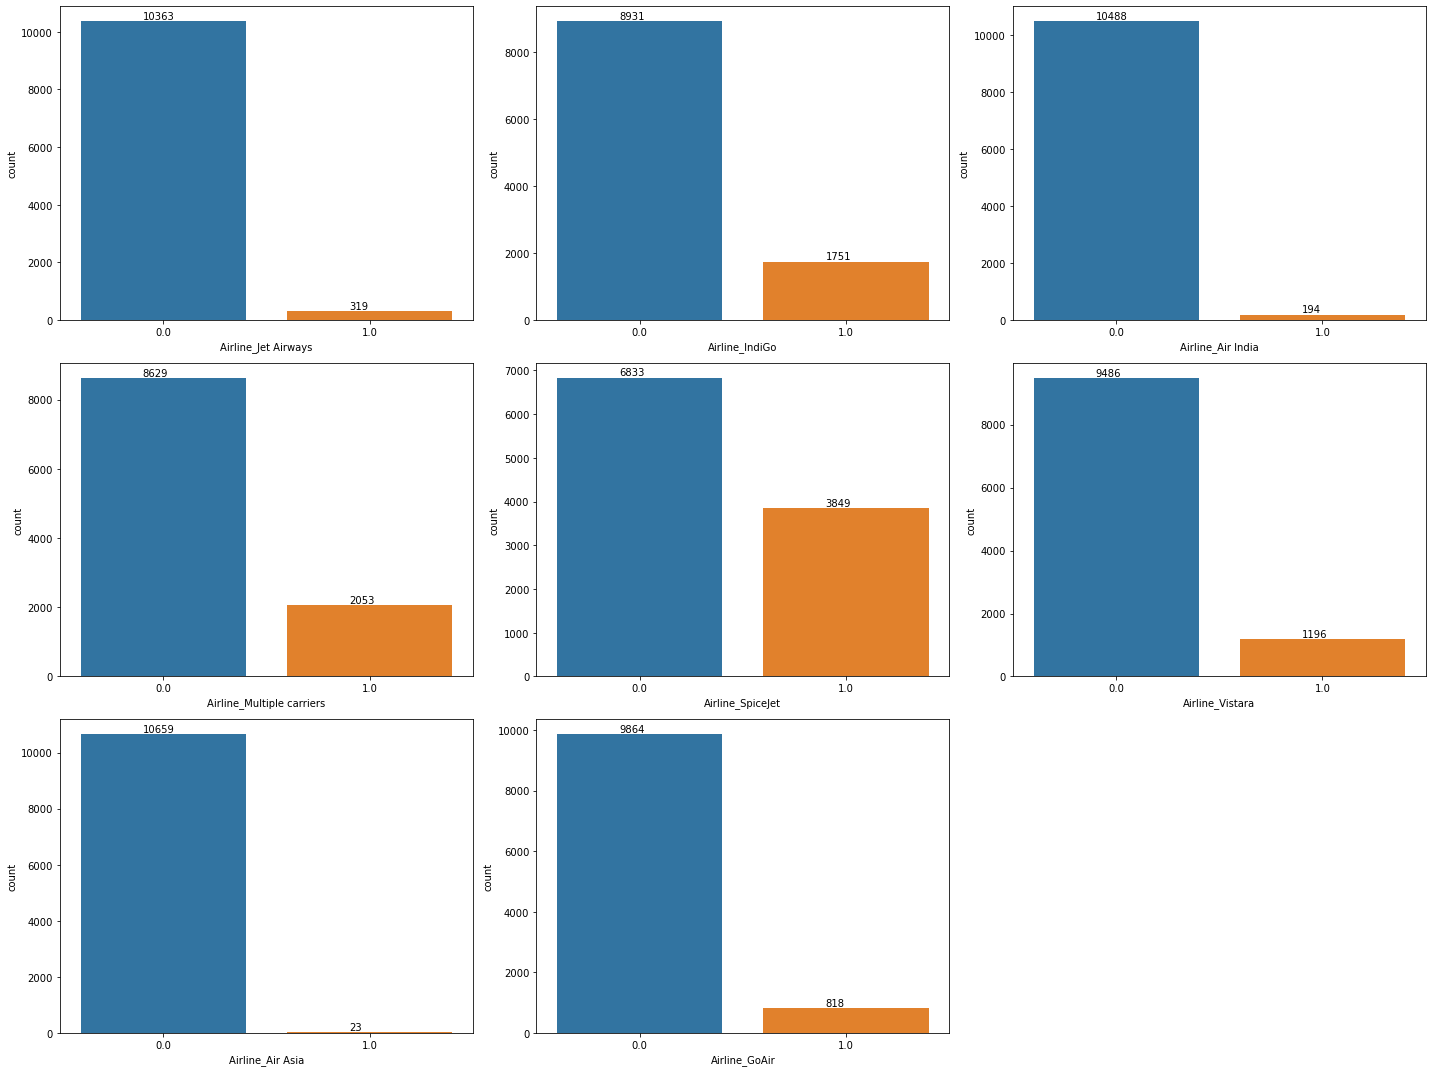

In [329]:
col=['Airline_Jet Airways', 'Airline_IndiGo',
       'Airline_Air India', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Air Asia', 'Airline_GoAir', 'Airline_Other']
plt.figure(figsize=(20,15))
plotnumber=1
for i in col:
    if plotnumber <9:
        ax=plt.subplot(3,3,plotnumber)
        s=sns.countplot(df_train[i])
        for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")
    plotnumber+=1
plt.tight_layout()
    

## 9.2 Source

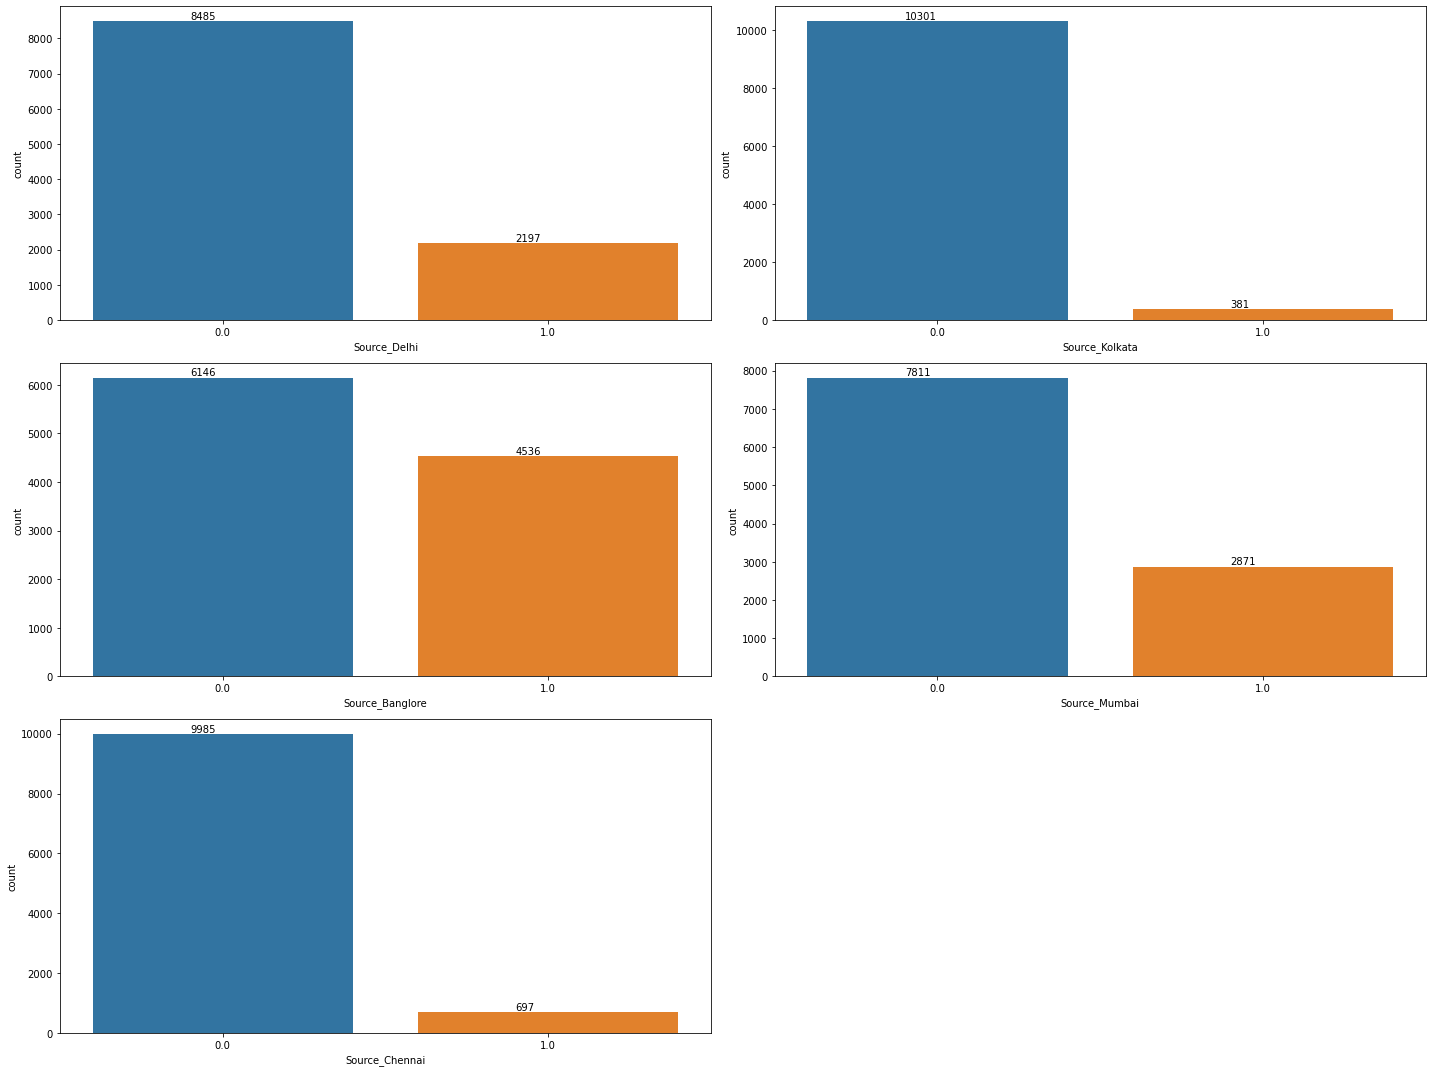

In [330]:
col=['Source_Delhi', 'Source_Kolkata', 'Source_Banglore', 'Source_Mumbai',
       'Source_Chennai']
plt.figure(figsize=(20,15))
plotnumber=1
for i in col:
    if plotnumber <6:
        ax=plt.subplot(3,2,plotnumber)
        s=sns.countplot(df_train[i])
        for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")
    plotnumber+=1
plt.tight_layout()
    

## 9.3 Total Stops

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

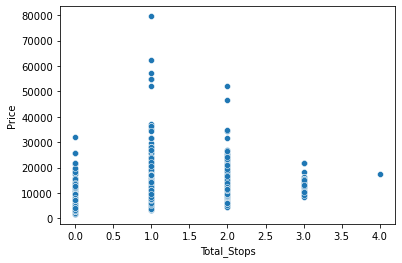

In [331]:
sns.scatterplot(x="Total_Stops",y="Price",data=df_train)

## 9.4 Additional Info

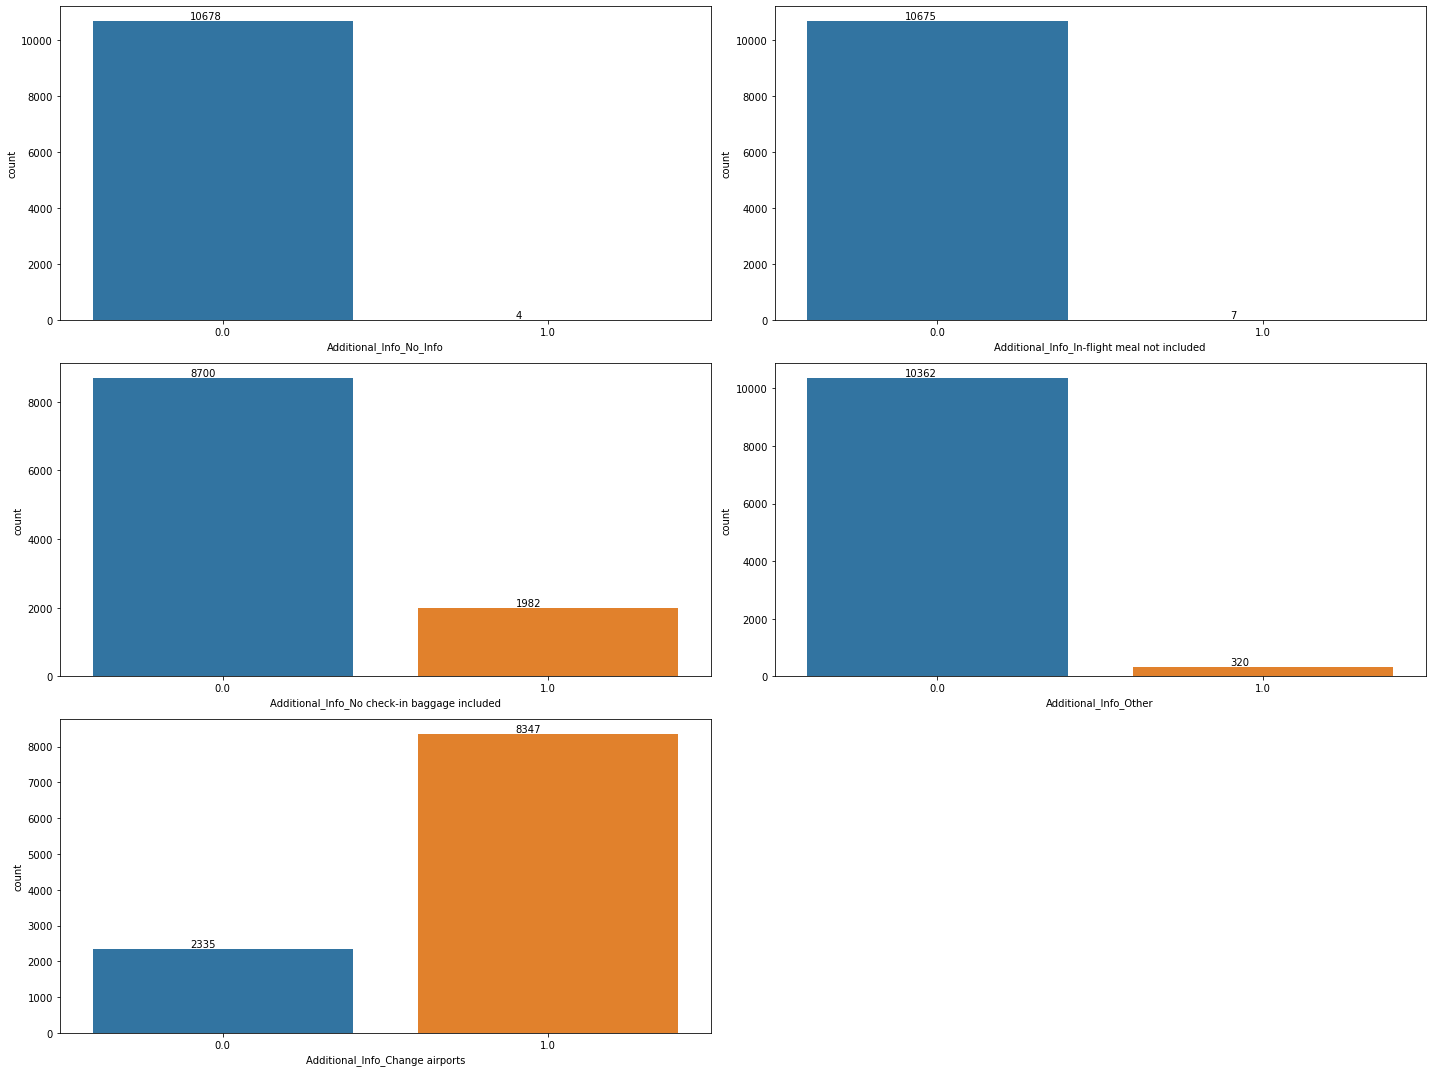

In [332]:
col=['Additional_Info_No_Info',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No check-in baggage included', 'Additional_Info_Other',
       'Additional_Info_Change airports', 'Additional_Info_Business class']
plt.figure(figsize=(20,15))
plotnumber=1
for i in col:
    if plotnumber <6:
        ax=plt.subplot(3,2,plotnumber)
        s=sns.countplot(df_train[i])
        for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")
    plotnumber+=1
plt.tight_layout()
    

## 9.5 Destination

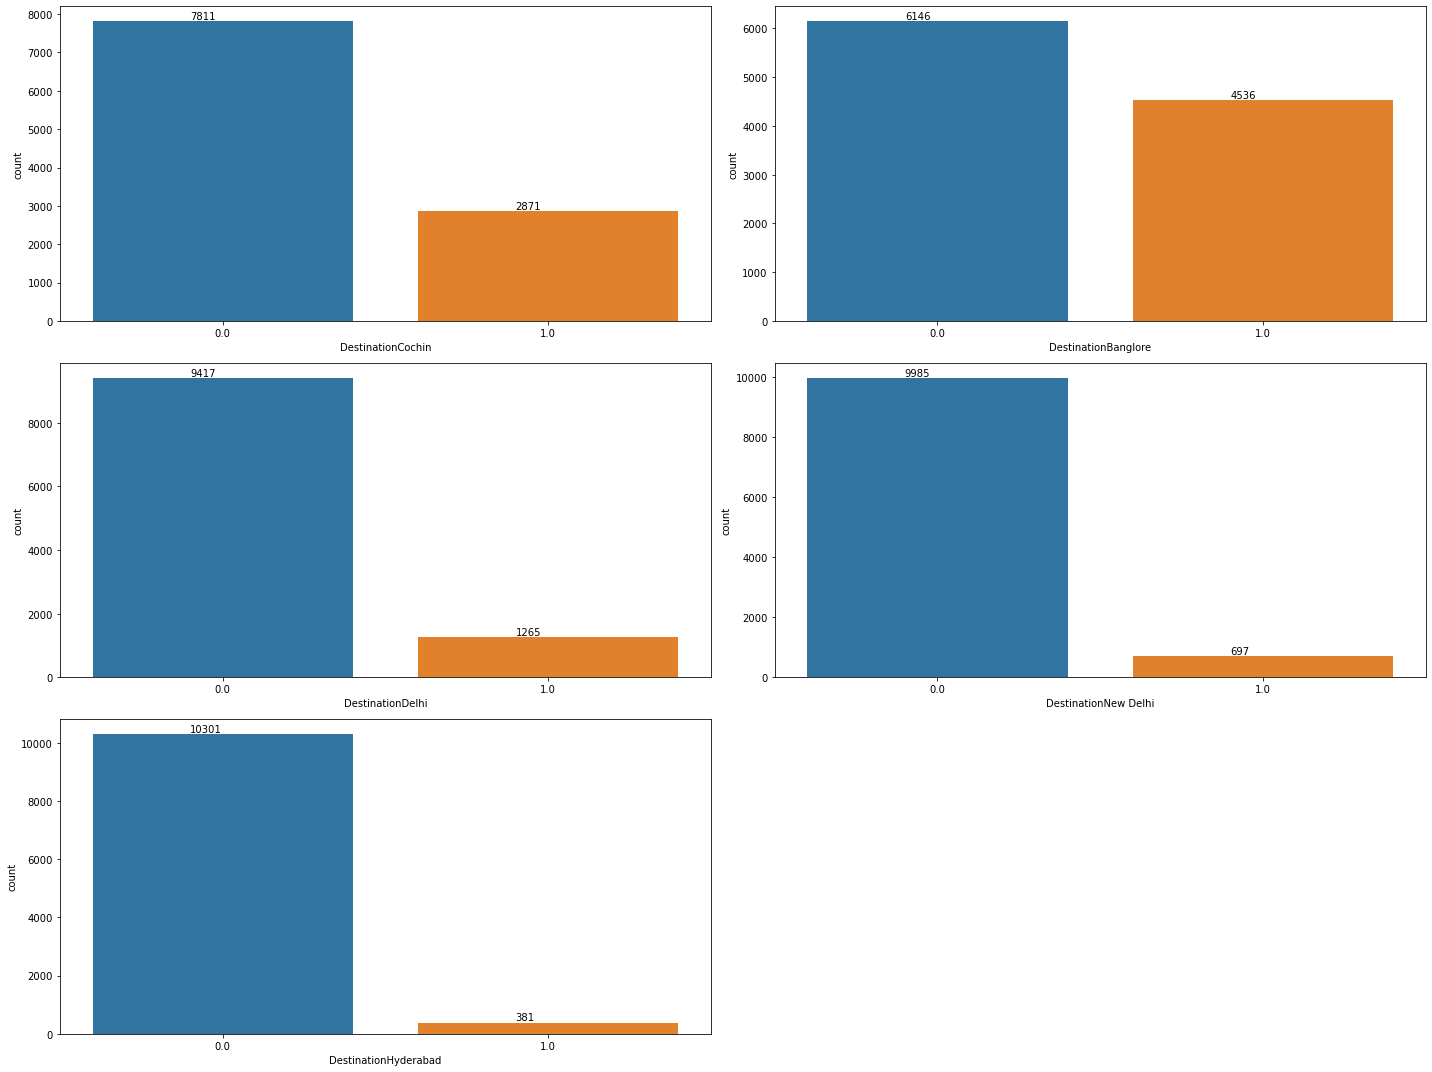

In [333]:
col=['DestinationCochin', 'DestinationBanglore', 'DestinationDelhi',
       'DestinationNew Delhi', 'DestinationHyderabad', 'DestinationKolkata']
plt.figure(figsize=(20,15))
plotnumber=1
for i in col:
    if plotnumber <6:
        ax=plt.subplot(3,2,plotnumber)
        s=sns.countplot(df_train[i])
        for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")
    plotnumber+=1
plt.tight_layout()
    

## 9.6 Duration

<AxesSubplot:xlabel='Duration', ylabel='Density'>

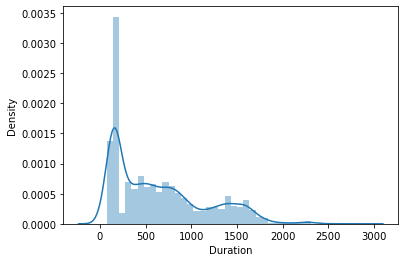

In [334]:
sns.distplot(df_train["Duration"])

## 9.7 Journey_month

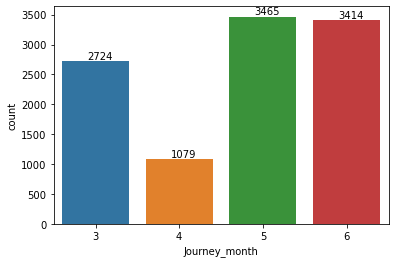

In [335]:
s=sns.countplot(df_train["Journey_month"])
for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

## 9.8 Departure Hour

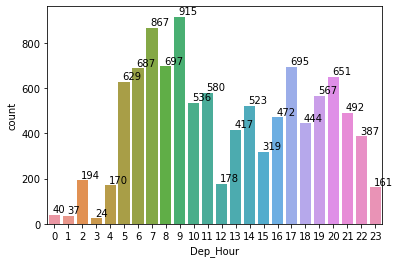

In [336]:
s=sns.countplot(df_train["Dep_Hour"])
for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

## 9.9 Arrival Hour

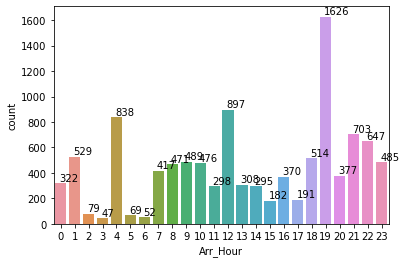

In [337]:
s=sns.countplot(df_train["Arr_Hour"])
for p in s.patches:
            s.annotate(int(p.get_height()),(p.get_x()+0.30,p.get_height()+1),va="bottom",color="black")

## 9.10 Price

<AxesSubplot:xlabel='Price', ylabel='Density'>

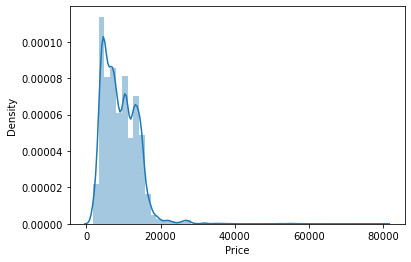

In [339]:
sns.distplot(df_train["Price"])

## 9.11 Duration Vs Price

<AxesSubplot:xlabel='Duration', ylabel='Price'>

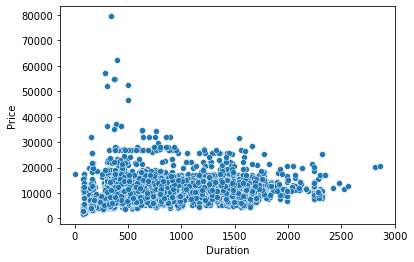

In [107]:
sns.scatterplot(x="Duration",y="Price",data=df_train)

## 9.12 Journey_month Vs Price

<AxesSubplot:xlabel='Journey_month', ylabel='Price'>

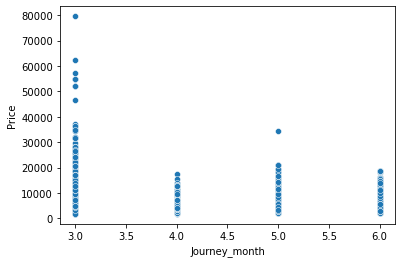

In [340]:
sns.scatterplot(x="Journey_month",y="Price",data=df_train)

## 9.13 Dep_Hour Vs Price

<AxesSubplot:xlabel='Dep_Hour', ylabel='Price'>

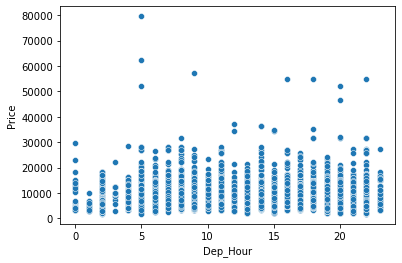

In [341]:
sns.scatterplot(x="Dep_Hour",y="Price",data=df_train)

## 9.14 Arr_Hour Vs Price

<AxesSubplot:xlabel='Arr_Hour', ylabel='Price'>

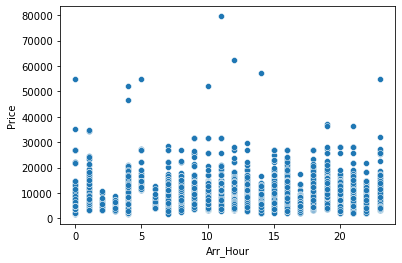

In [342]:
sns.scatterplot(x="Arr_Hour",y="Price",data=df_train)

## 9.15 Airline Vs Price

<AxesSubplot:xlabel='Airline_Other', ylabel='Price'>

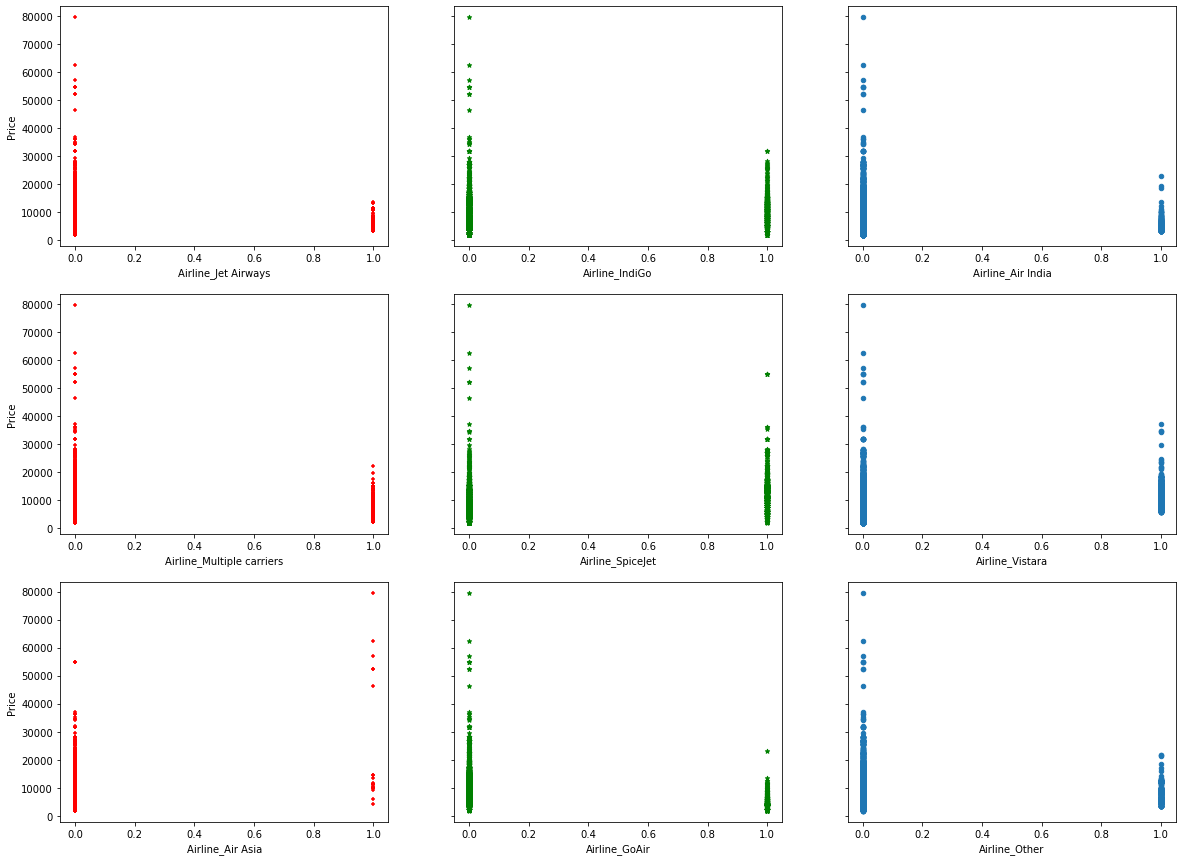

In [344]:
fig,axs=plt.subplots(3,3,sharey=True)
df_train.plot(kind="scatter",x="Airline_Jet Airways",y="Price",ax=axs[0,0],figsize=(20,15),color="r",marker="+")
df_train.plot(kind="scatter",x="Airline_IndiGo",y="Price",ax=axs[0,1],color="g",marker="*")
df_train.plot(kind="scatter",x="Airline_Air India",y="Price",ax=axs[0,2])
df_train.plot(kind="scatter",x="Airline_Multiple carriers",y="Price",ax=axs[1,0],color="r",marker="+")
df_train.plot(kind="scatter",x="Airline_SpiceJet",y="Price",ax=axs[1,1],color="g",marker="*")
df_train.plot(kind="scatter",x="Airline_Vistara",y="Price",ax=axs[1,2])
df_train.plot(kind="scatter",x="Airline_Air Asia",y="Price",ax=axs[2,0],color="r",marker="+")
df_train.plot(kind="scatter",x="Airline_GoAir",y="Price",ax=axs[2,1],color="g",marker="*")
df_train.plot(kind="scatter",x="Airline_Other",y="Price",ax=axs[2,2])


## 9.16 Source Vs Price

<AxesSubplot:xlabel='Source_Chennai', ylabel='Price'>

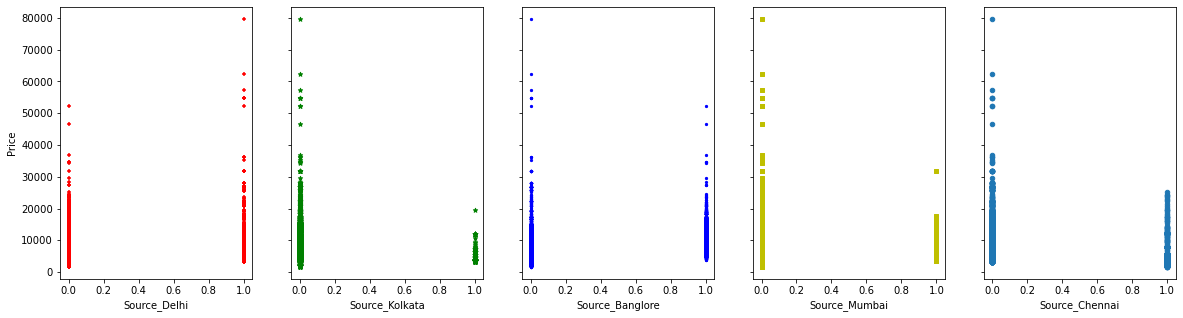

In [112]:
fig,axs=plt.subplots(1,5,sharey=True)
df_train.plot(kind="scatter",x="Source_Delhi",y="Price",ax=axs[0],figsize=(20,5),color="r",marker="+")
df_train.plot(kind="scatter",x="Source_Kolkata",y="Price",ax=axs[1],color="g",marker="*")
df_train.plot(kind="scatter",x="Source_Banglore",y="Price",ax=axs[2],color="b",marker=".")
df_train.plot(kind="scatter",x="Source_Mumbai",y="Price",ax=axs[3],color="y",marker=",")
df_train.plot(kind="scatter",x="Source_Chennai",y="Price",ax=axs[4])

## 9.17 Additional info Vs price

<AxesSubplot:xlabel='Additional_Info_Business class', ylabel='Price'>

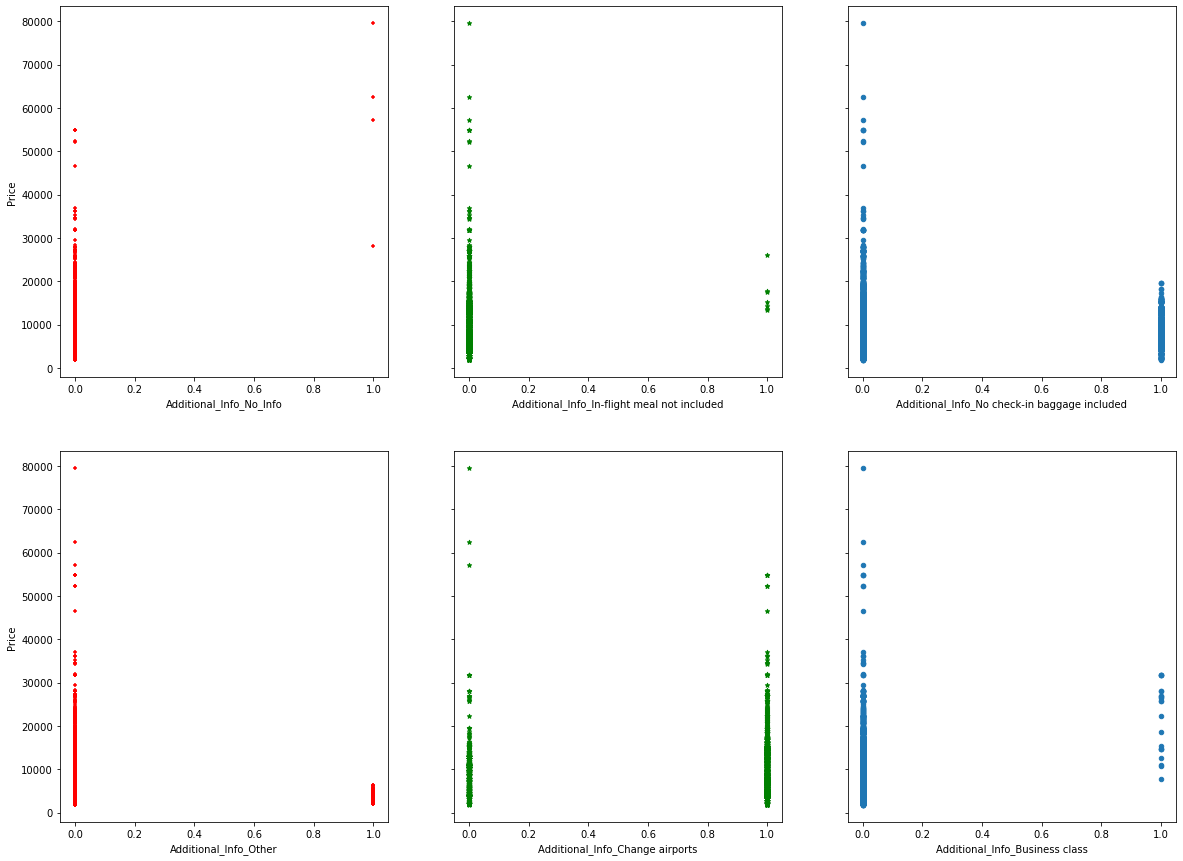

In [345]:
fig,axs=plt.subplots(2,3,sharey=True)
df_train.plot(kind="scatter",x="Additional_Info_No_Info",y="Price",ax=axs[0,0],figsize=(20,15),color="r",marker="+")
df_train.plot(kind="scatter",x="Additional_Info_In-flight meal not included",y="Price",ax=axs[0,1],color="g",marker="*")
df_train.plot(kind="scatter",x="Additional_Info_No check-in baggage included",y="Price",ax=axs[0,2])
df_train.plot(kind="scatter",x="Additional_Info_Other",y="Price",ax=axs[1,0],color="r",marker="+")
df_train.plot(kind="scatter",x="Additional_Info_Change airports",y="Price",ax=axs[1,1],color="g",marker="*")
df_train.plot(kind="scatter",x="Additional_Info_Business class",y="Price",ax=axs[1,2])


# 10. Dropping the unwanted columns

**As we have seen route columns having the city name and their route of flight, which we are getting same informtion from Total_Stops feature, so we will drop this columns.**

In [346]:
df_train.columns

Index(['Route', 'Duration', 'Total_Stops', 'Price', 'Journey_Day',
       'Journey_month', 'Dep_Hour', 'Dep_Minute', 'Arr_Hour', 'Arr_Minute',
       'Airline_Jet Airways', 'Airline_IndiGo', 'Airline_Air India',
       'Airline_Multiple carriers', 'Airline_SpiceJet', 'Airline_Vistara',
       'Airline_Air Asia', 'Airline_GoAir', 'Airline_Other', 'Source_Delhi',
       'Source_Kolkata', 'Source_Banglore', 'Source_Mumbai', 'Source_Chennai',
       'Additional_Info_No_Info',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No check-in baggage included', 'Additional_Info_Other',
       'Additional_Info_Change airports', 'Additional_Info_Business class',
       'DestinationCochin', 'DestinationBanglore', 'DestinationDelhi',
       'DestinationNew Delhi', 'DestinationHyderabad', 'DestinationKolkata'],
      dtype='object')

### From Training Dataset

In [347]:
df_train.drop("Route",axis=1,inplace=True)

### From Testing Dataset

In [348]:
df_test.drop("Route",axis=1,inplace=True)

In [349]:
df_train.shape, df_test.shape

((10682, 35), (2671, 34))

# 11. Splitting Dataset into training and testing

In [350]:
x=df_train.drop("Price",axis=1)

In [351]:
y=df_train.Price

In [352]:
x.shape

(10682, 34)

In [353]:
y.shape

(10682,)

# 12. Scaling Transformation with Standard Scaler

In [354]:
from sklearn.preprocessing import StandardScaler

In [355]:
scaler=StandardScaler()

In [356]:
x_scaled=scaler.fit_transform(x)

In [357]:
x_scaled.shape

(10682, 34)

# Model Building

## 13.1 Linear Regression

In [358]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [359]:
lr=LinearRegression()

In [360]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=101)

## 13.2 Choosing best random state

In [1689]:
from sklearn.metrics import r2_score
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"Model perfrom well")
        print("At random state",i)
        print("Training score is-",r2_score(y_train,pred_train)*100)
        print("Testing score is-",r2_score(y_test,pred_test)*100)
   

At random state 1 Model perfrom well
At random state 1
Training score is- 67.2595739846048
Testing score is- 67.32223701057659
At random state 64 Model perfrom well
At random state 64
Training score is- 67.14538748995149
Testing score is- 67.1084401597799
At random state 345 Model perfrom well
At random state 345
Training score is- 67.23312426738026
Testing score is- 67.19900730799633
At random state 346 Model perfrom well
At random state 346
Training score is- 67.26917130174957
Testing score is- 67.29019579392055


**we can choose random state 346.**

In [363]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=346)

In [364]:
lr.fit(x_train,y_train)

LinearRegression()

## 13.3 Evaluation Matrix

In [365]:
y_pred=lr.predict(x_test)

In [366]:
lr_score=r2_score(y_test,y_pred)

In [367]:
lr_score

0.6729019579392055

In [368]:
MAE=mean_absolute_error(y_test,y_pred)

In [369]:
MAE

1821.6515498872177

In [370]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [371]:
RMSE

2665.7295173300304

In [372]:
train_pred=lr.predict(x_train)

In [373]:
r2_score(y_train,train_pred)

0.6726917130174956

## 13.4 Choosing the best CV

In [140]:
from sklearn.model_selection import cross_val_score

In [1705]:
for j in range(2,15):
    lr_score=cross_val_score(lr,x_scaled,y,cv=j)
    lr_s=lr_score.mean()
    print("AT CV :-",j)
    print("Cross Validation score is:",lr_score*100)
    print("R2_score:",lr_s*100)
    print("\n")

AT CV :- 2
Cross Validation score is: [67.28908129 66.75156889]
R2_score: 67.0203250902057


AT CV :- 3
Cross Validation score is: [65.87907456 67.17655096 66.72141778]
R2_score: 66.5923477674724


AT CV :- 4
Cross Validation score is: [63.67672416 71.06235114 65.78736697 67.78286061]
R2_score: 67.0773257209751


AT CV :- 5
Cross Validation score is: [63.95688584 69.50231197 66.95807054 65.95829475 68.04124351]
R2_score: 66.88336132274809


AT CV :- 6
Cross Validation score is: [64.10190899 67.65243483 70.29857    65.25439176 66.36600722 68.02270508]
R2_score: 66.94933631412408


AT CV :- 7
Cross Validation score is: [62.97505058 67.35315758 70.72781288 66.83809742 65.95640594 67.36106019
 67.9307711 ]
R2_score: 67.02033652642196


AT CV :- 8
Cross Validation score is: [64.74031339 62.63676566 72.1826379  68.96953219 66.10527084 64.71442324
 66.85255281 68.32232949]
R2_score: 66.8154781913387


AT CV :- 9
Cross Validation score is: [64.18318456 63.72129832 69.35056844 70.07884144 67.78

**We can choose cv 14.**

In [374]:
cross_val_score(lr,x_train,y_train,cv=14)

array([0.65817775, 0.52556086, 0.63436106, 0.67542754, 0.71316358,
       0.73647926, 0.68044485, 0.59637421, 0.65370657, 0.6575202 ,
       0.64120211, 0.66577338, 0.6137129 , 0.61361318])

In [375]:
lr_cv_score=cross_val_score(lr,x_train,y_train,cv=14).mean()

In [376]:
lr_cv_score

0.6475369598277902

In [377]:
lr_score=r2_score(y_test,y_pred)

In [378]:
lr_score

0.6729019579392055

In [379]:
lr_MAE=MAE

In [380]:
lr_MAE

1821.6515498872177

## 14.1 KNN Regressor

In [381]:
from sklearn.neighbors import KNeighborsRegressor

In [382]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=346)

In [383]:
knn=KNeighborsRegressor()

In [384]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

## 14.2 Evaluation Metrics

In [385]:
y_pred=knn.predict(x_test)

In [386]:
r2_score(y_test,y_pred)

0.7884397014952051

In [387]:
MAE=mean_absolute_error(y_test,y_pred)

In [388]:
MAE

1070.311326053042

In [389]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [390]:
RMSE

2143.8490060371387

## 14.3 Choosing best CV 

In [1763]:
for j in range(2,15):
    knn_score=cross_val_score(knn,x_scaled,y,cv=j)
    knn_s=knn_score.mean()
    print("AT CV :-",j)
    print("Cross Validation score is:",knn_score*100)
    print("R2_score:",knn_s*100)
    print("\n")

AT CV :- 2
Cross Validation score is: [76.47800808 75.73687546]
R2_score: 76.10744177010872


AT CV :- 3
Cross Validation score is: [76.03024797 79.70034072 77.72602789]
R2_score: 77.81887219267506


AT CV :- 4
Cross Validation score is: [77.17696201 81.97262576 78.62980375 80.16130011]
R2_score: 79.48517290599554


AT CV :- 5
Cross Validation score is: [78.43716015 80.86666528 79.83090237 80.29180862 79.88673456]
R2_score: 79.86265419374871


AT CV :- 6
Cross Validation score is: [77.9215941  79.16973452 84.15080782 78.402596   80.29275029 80.33825186]
R2_score: 80.04595576496975


AT CV :- 7
Cross Validation score is: [76.69462445 78.06699365 85.59535138 79.97766217 78.68989219 83.09743078
 79.81139267]
R2_score: 80.27619246980146


AT CV :- 8
Cross Validation score is: [78.96108167 77.35088279 82.09102306 83.53244293 78.78440412 79.84873789
 81.88245599 80.10850431]
R2_score: 80.31994159286995


AT CV :- 9
Cross Validation score is: [78.3070102  80.47977369 78.20734536 84.88829912 7

**We can choose best cv 14**

In [391]:
cross_val_score(knn,x_train,y_train,cv=14)

array([0.57096171, 0.75341466, 0.8021248 , 0.76531015, 0.83633433,
       0.84003978, 0.82647998, 0.70562563, 0.79495724, 0.75314768,
       0.76391502, 0.80584215, 0.74492677, 0.76452683])

In [392]:
knn_cv_score=cross_val_score(knn,x_train,y_train,cv=14).mean()

In [393]:
knn_score=r2_score(y_test,y_pred)

In [394]:
knn_score

0.7884397014952051

In [395]:
knn_cv_score

0.76625762431296

In [396]:
knn_MAE=MAE

In [397]:
knn_MAE

1070.311326053042

## 15.1 Random Forest Regressor

In [455]:
from sklearn.ensemble import RandomForestRegressor

In [456]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=346)

ValueError: Found input variables with inconsistent numbers of samples: [2671, 10682]

In [457]:
rfr=RandomForestRegressor()

In [458]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

## 15.2 Evaluation Metrics

In [459]:
y_pred=rfr.predict(x_test)

In [460]:
rfr_score=r2_score(y_test,y_pred)

In [461]:
MAE=mean_absolute_error(y_test,y_pred)

In [462]:
MAE

712.8192580367978

In [463]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [464]:
RMSE

1631.1564209494593

## 15.3 Chossing best CV 

In [1744]:
for j in range(2,15):
    rfr_score=cross_val_score(rfr,x_scaled,y,cv=j)
    rfr_s=rfr_score.mean()
    print("AT CV :-",j)
    print("Cross Validation score is:",rfr_score*100)
    print("R2_score:",rfr_s*100)
    print("\n")

AT CV :- 2
Cross Validation score is: [86.9292223  85.98440761]
R2_score: 86.45681495626609


AT CV :- 3
Cross Validation score is: [84.83828466 90.09468625 84.83916771]
R2_score: 86.59071287472725


AT CV :- 4
Cross Validation score is: [83.82659878 90.74043027 90.26685074 86.96848147]
R2_score: 87.95059031312984


AT CV :- 5
Cross Validation score is: [87.50314174 88.93134849 91.54522113 90.54170982 86.04813894]
R2_score: 88.91391202576042


AT CV :- 6
Cross Validation score is: [88.90298904 85.73854399 91.84858556 89.58202712 91.84445855 84.42412392]
R2_score: 88.72345469676972


AT CV :- 7
Cross Validation score is: [88.83699171 84.72993509 91.45364932 91.06826653 90.45186434 93.16909185
 83.22110067]
R2_score: 88.99012850079521


AT CV :- 8
Cross Validation score is: [89.7505972  83.95223376 90.85717775 91.7356834  90.79919053 90.57903775
 91.41671288 84.56971468]
R2_score: 89.20754349314763


AT CV :- 9
Cross Validation score is: [87.93439945 87.93960251 85.81810135 91.97092881 9

**We can choose best cv 13.**

In [465]:
cross_val_score(rfr,x_train,y_train,cv=13)

array([0.65925749, 0.88734021, 0.90127135, 0.90979315, 0.91862762,
       0.87632123, 0.8334439 , 0.93934839, 0.79687857, 0.89418602,
       0.87929635, 0.89342335, 0.82906635])

In [466]:
rfr_cv_score=cross_val_score(rfr,x_train,y_train,cv=13).mean()

In [467]:
rfr_cv_score

0.8623453862844216

In [468]:
rfr_score=r2_score(y_test,y_pred)

In [469]:
rfr_score

0.87752794564589

In [470]:
rfr_MAE=MAE

In [471]:
rfr_MAE

712.8192580367978

## 16.1 Gradient Boosting

In [415]:
from sklearn.ensemble import GradientBoostingRegressor

In [416]:
gbr=GradientBoostingRegressor()

In [417]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

## 16.2 Evaluation Metrics

In [418]:
y_pred=gbr.predict(x_test)

In [419]:
r2_score(y_test,y_pred)

0.8206424849723472

In [420]:
MAE=mean_absolute_error(y_test,y_pred)

In [421]:
MAE

1278.62454276295

In [422]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [423]:
RMSE

1973.9534084798936

## 16.3 Choosing best CV

In [1780]:
for j in range(2,15):
    gbr_score=cross_val_score(gbr,x_scaled,y,cv=j)
    gbr_s=gbr_score.mean()
    print("AT CV :-",j)
    print("Cross Validation score is:",gbr_score*100)
    print("R2_score:",gbr_s*100)
    print("\n")

AT CV :- 2
Cross Validation score is: [81.37833092 80.01709427]
R2_score: 80.69771259613367


AT CV :- 3
Cross Validation score is: [80.47042856 82.23791332 80.26037748]
R2_score: 80.98957312144674


AT CV :- 4
Cross Validation score is: [78.08804868 85.03010855 81.29914063 81.87275825]
R2_score: 81.5725140280309


AT CV :- 5
Cross Validation score is: [79.426058   81.53037877 82.57732291 81.91401886 81.52141629]
R2_score: 81.39383896512011


AT CV :- 6
Cross Validation score is: [79.0599125  81.22895716 84.00646992 81.4229905  82.54867088 81.03453975]
R2_score: 81.550256786743


AT CV :- 7
Cross Validation score is: [78.89401842 80.55695054 84.70591556 82.32616474 83.22477593 81.46455098
 80.75374664]
R2_score: 81.70373183086646


AT CV :- 8
Cross Validation score is: [82.5002418  75.17571037 85.45510947 84.36573079 82.13990113 82.08231478
 82.94071369 80.48103592]
R2_score: 81.89259474410262


AT CV :- 9
Cross Validation score is: [80.51231931 78.53414254 81.31248671 83.78697791 82.9

**We can choose best cv 13.**

In [424]:
cross_val_score(rfr,x_train,y_train,cv=13)

array([0.66301842, 0.88700631, 0.90071211, 0.90402091, 0.91337009,
       0.86119448, 0.83773802, 0.93264209, 0.79548198, 0.89434145,
       0.88401357, 0.89475305, 0.83944578])

In [425]:
gbr_cv_score=cross_val_score(rfr,x_train,y_train,cv=13).mean()

In [426]:
gbr_cv_score

0.8620669415789546

In [427]:
gbr_score=r2_score(y_test,y_pred)

In [428]:
gbr_score

0.8206424849723472

In [429]:
gbr_MAE=MAE

In [430]:
gbr_MAE

1278.62454276295

# 17 Choosing best model by checking cross validation score

In [475]:
Linear_Regression={"Accuracy Score":(lr_score,2),
                    "CV Score":(lr_cv_score,2),
                    "Difference":lr_score-lr_cv_score,
                  "MAE":lr_MAE}
Knn={"Accuracy Score":(knn_score,2),
                    "CV Score":(knn_cv_score,2),
                    "Difference":knn_score-knn_cv_score,
                    "MAE":knn_MAE}
Random_Forest_Regressor={"Accuracy Score":(rfr_score,2),
                    "CV Score":(rfr_cv_score,2),
                    "Difference":rfr_score-rfr_cv_score,
                        "MAE": rfr_MAE}
Gradient_Boost_Regressor={"Accuracy Score":(gbr_score,2),
                    "CV Score":(gbr_cv_score,2),
                    "Difference":gbr_score-gbr_cv_score,
                         "MAE":gbr_MAE}

In [476]:
data=np.array([[lr_score,lr_cv_score,lr_score-lr_cv_score,lr_MAE],[knn_score,knn_cv_score,knn_score-knn_cv_score,knn_MAE],[rfr_score,rfr_cv_score,rfr_score-rfr_cv_score,rfr_MAE],[gbr_score,gbr_cv_score,gbr_score-gbr_cv_score,gbr_MAE]])

In [477]:
index_value=["LInearRegression","KNeighborsRegressor","RandomForestRegressor","GradientBoostRegressor"]

In [478]:
columns_value=["Score","Cross Validation Score","Difference","MAE"]

In [479]:
model_selection=pd.DataFrame(data=data,
                            index=index_value,
                            columns=columns_value)

In [480]:
model_selection

,Score,Cross Validation Score,Difference,MAE
LInearRegression,0.672902,0.647537,0.025365,1821.651550
KNeighborsRegressor,0.788440,0.766258,0.022182,1070.311326
RandomForestRegressor,0.877528,0.862345,0.015183,712.819258
GradientBoostRegressor,0.820642,0.862067,-0.041424,1278.624543


**As we can see amoung all model Random Forest Regressor is performing better in MAE and difference between score and cv.**

# 18.Hypertuning for our best model ( Random Forest Regressor)

In [481]:
from sklearn.model_selection import GridSearchCV

In [482]:
param={"min_samples_split":[2,6,8],
      "min_samples_leaf":[1,3,5,7,9],
      "n_estimators":[150,200]
      }
      

In [483]:
RandomForestRegressor()

RandomForestRegressor()

In [484]:
grd=GridSearchCV(rfr,param_grid=param)

In [485]:
grd.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'min_samples_leaf': [1, 3, 5, 7, 9],
                         'min_samples_split': [2, 6, 8],
                         'n_estimators': [150, 200]})

In [486]:
grd.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

In [487]:
rfr=grd.best_estimator_

In [488]:
rfr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=200)

In [489]:
y_pred=rfr.predict(x_test)

In [490]:
r2_score(y_test,y_pred)

0.8778731476139574

**As we can see after doing hyperparamet tuning our model accuracy has marginally increased from 87.75 to 87.78.**

# 19. Model Prediction on Test Dataset

In [491]:
df_test.shape

(2671, 34)

In [492]:
x=df_test

In [493]:
scaler=StandardScaler()

In [494]:
x_scaled=scaler.fit_transform(x)

In [495]:
x_scaled.shape

(2671, 34)

In [496]:
prediction=rfr.predict(x_scaled)

In [497]:
prediction

array([14675.03 ,  4254.125, 12898.   , ..., 15945.485, 15076.055,
        7439.84 ])

# 20. Model Saving

In [498]:
import pickle
filename="Flight_fare_prediction.pkl"
pickle.dump(rfr,open(filename,"wb"))